<a href="https://colab.research.google.com/github/LOWERCAS3/PracticeProjects/blob/master/Stock%20market%20analysis%20and%20prediction%20from%20Yahoo/StockMarketAnalysisAndPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rough Goals:**
Analyse Stock market data of some specific companines and get stock informations using pandas, 
Visualize and Analyse the stocks based on its history 

**Detailed Objective**


---
Browse through Stocks on Yahoo.com and pick some websites.

Try To answer the questions
1.   What was the change in price of the stock over time?
2.   What was the daily return of the stock on average?
1.   What was the moving average of the various stocks?
2.   What was the correlation between different stocks'?
1.   How much value do we put at risk by investing in a particular stock?
2.   How can we attempt to predict future stock behavior?








Outline of Work


*   Change in price of the stock over time.


> Import Libraries.

> Read Stock Data from Yahoo.

> Choose Stocks work with.

> Clean Data and Create DataFrame.

> Visualize Data on per Stock basis.









In [2]:
#Used to get data from yahoo
!pip install pandas-datareader
!pip install yfinance
!pip install yahoofinancials

     |████████████████████████████████| 6.4 MB 7.7 MB/s 
     |████████████████████████████████| 63 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


  Created wheel for yahoofinancials: filename=yahoofinancials-1.6-py3-none-any.whl size=15192 sha256=8acd0a49b2145385b337e84bb4cdaffb9a6e1f577748c505ade209dace3cf6e8
  Stored in directory: /root/.cache/pip/wheels/4b/63/46/e7110bfee88685fe69e338d1b14d1748921862aa57b6705b60
Successfully built yahoofinancials


In [3]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader 
from pandas_datareader import data as pdr
import yfinance as yf
from yahoofinancials import YahooFinancials

# For time stamps
from datetime import datetime

In [4]:
# The tech stocks we'll use for this analysis
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Set up End and Start times for data grab
endDate= datetime.now()
startDate = datetime(endDate.year - 1, endDate.month , endDate.day)


In [5]:
#Getting dataset for each stock
for i in tech_list:
  name = i
  globals()[i] = yf.download(name, start=startDate, end=endDate, progress=False)


In [6]:
#Adding Company name as attribute of df
company_list = [AAPL, GOOG, MSFT, AMZN]
company_name = ['APPLE', 'GOOGLE', 'MICROSOFT', 'AMAZON']

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name


In [7]:
#Creating single df
df = pd.concat(company_list, axis=0)
df.head(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2021-02-05,NaN,NaN,NaN,NaN,NaN,NaN,APPLE
2021-02-08,136.029999,136.960007,134.919998,136.910004,136.101074,71297200.0,APPLE
2021-02-09,136.619995,137.880005,135.850006,136.009995,135.206390,76774200.0,APPLE
2021-02-10,136.479996,136.990005,134.399994,135.389999,134.590057,73046600.0,APPLE
2021-02-11,135.899994,136.389999,133.770004,135.130005,134.331604,64280000.0,APPLE
2021-02-12,134.350006,135.529999,133.690002,135.369995,134.570175,60145100.0,APPLE
2021-02-16,135.490005,136.009995,132.789993,133.190002,132.403076,80576300.0,APPLE
2021-02-17,131.250000,132.220001,129.470001,130.839996,130.066940,97918500.0,APPLE
2021-02-18,129.199997,130.000000,127.410004,129.710007,128.943634,96856700.0,APPLE


In [8]:
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,144.398135,145.924842,142.978174,144.513373,144.030714,8.961068e+07
std,16.705964,17.038174,16.508444,16.795279,16.962797,2.852190e+07
min,119.029999,120.400002,116.209999,116.360001,115.672493,4.100000e+07
25%,129.905003,130.845001,128.730003,130.195004,129.598034,6.897910e+07
50%,144.205002,146.325005,143.570000,145.384995,144.846184,8.474040e+07
75%,151.657501,153.250000,150.280003,152.000000,151.585354,1.056470e+08
max,182.630005,182.940002,179.119995,182.009995,181.778397,1.954327e+08


In [9]:
#Genaral Information
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-02-05 to 2022-02-04
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    float64
 6   company_name  253 non-null    object 
dtypes: float64(6), object(1)
memory usage: 15.8+ KB


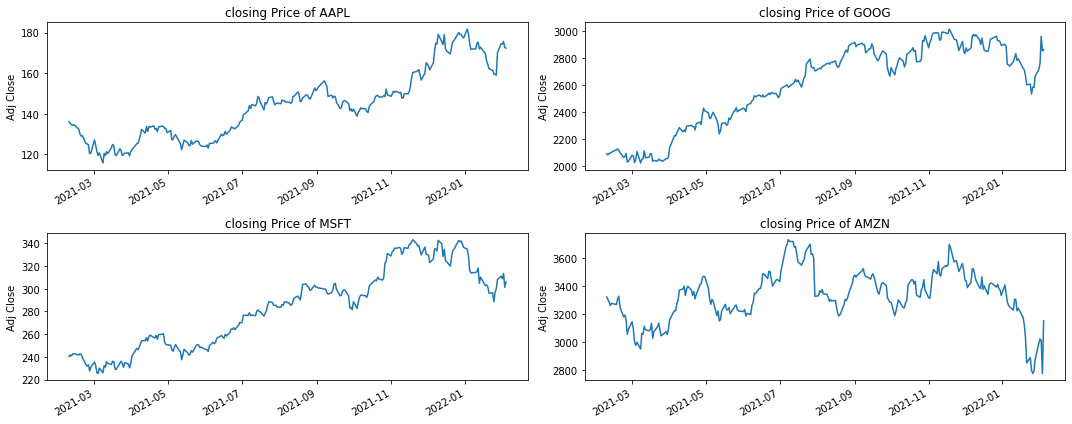

In [10]:
# Historical View

plt.figure(figsize=(15,6))
# plt.subplots_adjust(top=1.5, bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(2,2,i)
  company['Adj Close'].plot()
  plt.ylabel('Adj Close')
  plt.xlabel(None)
  plt.title(f"closing Price of {tech_list[i-1]}")

plt.tight_layout()

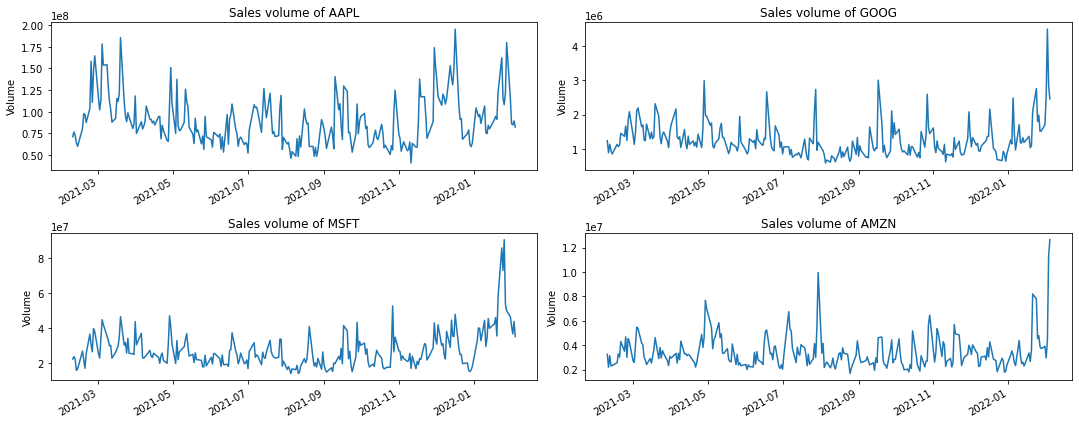

In [11]:
# Ploting volume of stocks traded each day
plt.figure(figsize=(15,6))
plt.subplots_adjust(top=1.5, bottom=1.2)

for i, company in enumerate(company_list, 1):
  plt.subplot(2,2,i)
  company['Volume'].plot()
  plt.ylabel('Volume')
  plt.xlabel(None)
  plt.title(f"Sales volume of {tech_list[i-1]}")

plt.tight_layout()



```
What was the moving average of the various stocks?
```
Todo



Use Adj Close and number of days to calculate Moving average.

Visualize the Results in one single visualization.


In [23]:
#Adding moving Average columns into dataset
Moving_ave = [10, 20, 50]

for period in Moving_ave:
  for company in company_list:
    column_name = f"MOVING AVERAGE FOR {period} DAYS"
    company[column_name] = company['Adj Close'].rolling(period).mean() 

In [29]:
GOOG.drop(['Daily Return'], axis='columns', inplace=True)
GOOG.tail()

,Open,High,Low,Close,Adj Close,Volume,company_name,MOVING AVERAGE FOR 10 DAYS,MOVING AVERAGE FOR 20 DAYS,MOVING AVERAGE FOR 50 DAYS
Date,,,,,,,,,,
2022-01-31,2683.959961,2716.870117,2645.479980,2713.969971,2713.969971,1702800,GOOGLE,2639.994995,2720.854517,2839.115020
2022-02-01,2756.699951,2764.000000,2691.364990,2757.570068,2757.570068,2560200,GOOGLE,2643.170996,2713.658521,2833.982822
2022-02-02,3037.270020,3042.000000,2911.149902,2960.729980,2960.729980,4487500,GOOGLE,2667.939990,2717.278516,2833.216421
2022-02-03,2905.899902,2982.354004,2844.100098,2853.010010,2853.010010,2846500,GOOGLE,2686.228003,2722.275513,2831.445220
2022-02-04,2860.340088,2890.705078,2796.350098,2860.320068,2860.320068,2458600,GOOGLE,2712.076001,2727.740515,2829.948823


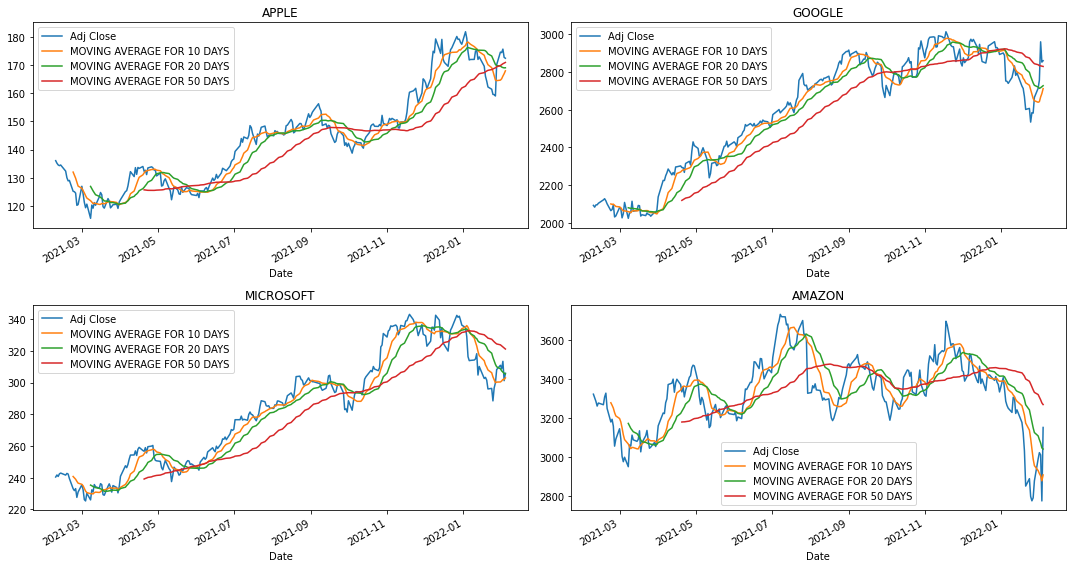

In [30]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)


AAPL[['Adj Close', 'MOVING AVERAGE FOR 10 DAYS', 'MOVING AVERAGE FOR 20 DAYS', 'MOVING AVERAGE FOR 50 DAYS']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Adj Close', 'MOVING AVERAGE FOR 10 DAYS', 'MOVING AVERAGE FOR 20 DAYS', 'MOVING AVERAGE FOR 50 DAYS']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Adj Close', 'MOVING AVERAGE FOR 10 DAYS', 'MOVING AVERAGE FOR 20 DAYS', 'MOVING AVERAGE FOR 50 DAYS']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Adj Close', 'MOVING AVERAGE FOR 10 DAYS', 'MOVING AVERAGE FOR 20 DAYS', 'MOVING AVERAGE FOR 50 DAYS']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()



```
What was the daily return of the stock on average?
```
TODO

Find percent change for each day

Visualise daily return using Seaborn


In [31]:
for company in company_list:
  company['Daily Return'] = company['Adj Close'].pct_change()

In [32]:
GOOG.tail()

,Open,High,Low,Close,Adj Close,Volume,company_name,MOVING AVERAGE FOR 10 DAYS,MOVING AVERAGE FOR 20 DAYS,MOVING AVERAGE FOR 50 DAYS,Daily Return
Date,,,,,,,,,,,
2022-01-31,2683.959961,2716.870117,2645.479980,2713.969971,2713.969971,1702800,GOOGLE,2639.994995,2720.854517,2839.115020,0.018073
2022-02-01,2756.699951,2764.000000,2691.364990,2757.570068,2757.570068,2560200,GOOGLE,2643.170996,2713.658521,2833.982822,0.016065
2022-02-02,3037.270020,3042.000000,2911.149902,2960.729980,2960.729980,4487500,GOOGLE,2667.939990,2717.278516,2833.216421,0.073674
2022-02-03,2905.899902,2982.354004,2844.100098,2853.010010,2853.010010,2846500,GOOGLE,2686.228003,2722.275513,2831.445220,-0.036383
2022-02-04,2860.340088,2890.705078,2796.350098,2860.320068,2860.320068,2458600,GOOGLE,2712.076001,2727.740515,2829.948823,0.002562


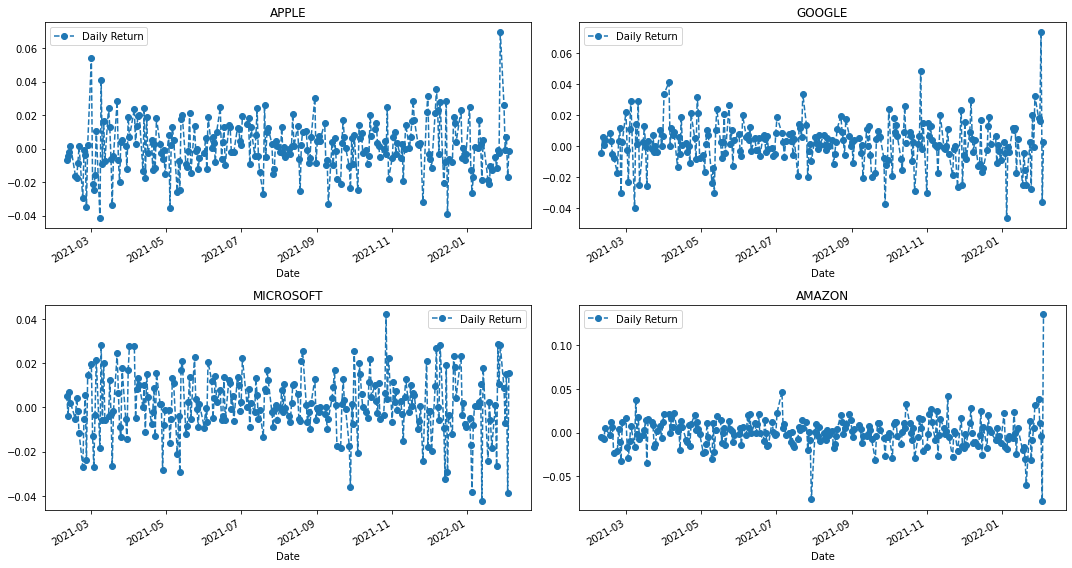

In [38]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

fig.tight_layout()